##**Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


##**Image Augmentation**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
data_path = '/content/drive/MyDrive/flowers/'
batch_size = 32
target_size = (64, 64)

Mounted at /content/drive/


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [5]:
X_train = train_datagen.flow_from_directory(data_path,target_size=target_size,batch_size=batch_size,subset="training",class_mode='categorical')
X_test = test_datagen.flow_from_directory(data_path,target_size=target_size,batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


##**Create Model**

In [6]:
model = Sequential()

##**Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)**

In [7]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

##**Compile the model**

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##**Fit the model**

In [9]:
model.fit(X_train, steps_per_epoch=100, epochs=15)

Epoch 1/15
100/100 [==============================] - 430s 4s/step - loss: 1.3314 - accuracy: 0.4074
Epoch 2/15
100/100 [==============================] - 55s 553ms/step - loss: 1.1461 - accuracy: 0.5349
Epoch 3/15
100/100 [==============================] - 31s 309ms/step - loss: 1.0515 - accuracy: 0.5914
Epoch 4/15
100/100 [==============================] - 30s 296ms/step - loss: 1.0089 - accuracy: 0.6015
Epoch 5/15
100/100 [==============================] - 29s 291ms/step - loss: 0.9491 - accuracy: 0.6216
Epoch 6/15
100/100 [==============================] - 29s 293ms/step - loss: 0.9204 - accuracy: 0.6311
Epoch 7/15
100/100 [==============================] - 29s 291ms/step - loss: 0.8749 - accuracy: 0.6513
Epoch 8/15
100/100 [==============================] - 30s 296ms/step - loss: 0.8687 - accuracy: 0.6560
Epoch 9/15
100/100 [==============================] - 30s 295ms/step - loss: 0.8660 - accuracy: 0.6630
Epoch 10/15
100/100 [==============================] - 29s 291ms/step - los

##**Save the model**

In [10]:
model.save("model.h5")

##**Test the model**

In [11]:
def predict():
    img = image.load_img("/content/drive/MyDrive/flowers/daisy/43474673_7bb4465a86.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("/content/drive/MyDrive/flowers/daisy/43474673_7bb4465a86.jpg"))
    plt.axis('off')
    plt.show()


The given image is a daisy


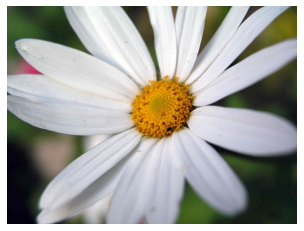

In [12]:
predict() 